# Part 1 - Bisection Method

## Function:

$f(x) = e^{sin(x)} + x^4 - 2x^3 - x^2 - 1$

## Objective:
Use Bisection Method to find all $x$ where $f(x)=0$ to an accuracy of at least $10^{-6}$ with intial intervals of $[-2,\frac{-1}{2}]$ and $[\frac{1}{2}, 2]$.

* Step 1: Use Bisection Method Theorem to determine the number of steps needed to achive an error of less than $10^{-6}$

* Step 2: Implement the algorithm using Python

### Step 1: Bisection Method Theorem

The Bisection Method Theorem tells us that when the bisection algorithm is applied to a continuous function $f(x)$ on $[a, b]$ where $f(a) \cdot f(b) < 0$, then after n steps, an estimated root will be computed with an error of at most $\frac{b-a}{2^{n+1}}$.

\

Therefore, to determine the number of steps needed for the bisection algorithm  to achive an error of less than $10^{-6}$ in the given interval $[-2,\frac{-1}{2}]$, we can solve for $n$ where:

$$\frac{-2-\frac{-1}{2}}{2^{n+1}}< \frac{1}{10^6}$$

After cross-multipying, we get:

$$\frac{3}{2}\cdot 10^6 < 2^{n+1}$$

After applying $\log_{2}$ to each side, we get:
$$\log_{2}(\frac{3}{2} \cdot 10^6) < n + 1$$

Simplying:

$$\log_{2}(\frac{3}{2}) + \log_{2}(10^6) - 1 < n$$

$$\log_{2}(\frac{3}{2}) + 6 \cdot \log_{2}(10) - 1 < n$$






In [ ]:
# Solving for n

import math

x = math.log2(3/2) + 6*math.log2(10) - 1

print(x)





19.516531070045332


Since $n$ must be a positve integer greater than $\approx 19.516531070045332$: $$n = 20$$

Therefore, the bisection algorithm will take 20 steps to estimate a root for $f(x)$ in the interval $[-2,\frac{-1}{2}]$ or in the interval $[\frac{1}{2},2]$.

### Step 2: Implement Bisection Algorithm in Python

Running the algorithm on the interval: $[-2,\frac{-1}{2}]$

In [ ]:
import pandas as pd

# Defining a function for the bisection algorithm

def bisection_algorithm(f, a, b, nmax, e):
  table = [] # This list will store n, c, f(c), and abs error for every iteration

  f_a = f(a)
  f_b = f(b)
  if f(a)*f(b) >= 0:
    print("Error! f(x) has the sign at a and b")
    return

  error = b - a

  for n in range(1, nmax+1):
    error = error/2
    c = a + error
    f_c = f(c)

    table.append([n, c, f_c, abs(error)])

    if abs(error) < e:
      print("The root is", c)
      return
    if f_a*f_c < 0:
      b = c
      f_b = f_c
    else:
      a = c
      f_a = f_c
  print("The root is", c)
  return table

# Defining the function f(x)

f = lambda x: math.exp(math.sin(x)) + x**4 - 2*x**3 - x**2 - 1

# Running the algorithm and storing the completed table as "table"

table = bisection_algorithm(f, -2, -1/2, 5, 10**-6)

# converting "table" into a data frame

df = pd.DataFrame(table, columns=['n', 'c', 'f(c)', 'abs error'])
df.style.hide(axis='index')


The root is -0.734375


n,c,f(c),abs error
1,-1.250000,4.172290,0.750000
2,-0.875000,0.624552,0.375000
3,-0.687500,-0.069206,0.187500
4,-0.781250,0.210372,0.093750
5,-0.734375,0.055297,0.046875


Running the algorithm on the interval: $[\frac{1}{2},2]$

In [ ]:
import pandas as pd

# Defining a function for the bisection algorithm

def bisection_algorithm(f, a, b, nmax, e):
  table = [] # This list will store n, c, f(c), and abs error for every iteration

  f_a = f(a)
  f_b = f(b)
  if f(a)*f(b) >= 0:
    print("Error! f(x) has the sign at a and b")
    return

  error = b - a

  for n in range(1, nmax+1):
    error = error/2
    c = a + error
    f_c = f(c)

    table.append([n, c, f_c, abs(error)])

    if abs(error) < e:
      print("The root is", c)
      return
    if f_a*f_c < 0:
      b = c
      f_b = f_c
    else:
      a = c
      f_a = f_c
  print("The root is", c)
  return table

# Defining the function f(x)

f = lambda x: math.exp(math.sin(x)) + x**4 - 2*x**3 - x**2 - 1

# Running the algorithm and storing the completed table as "table"

table = bisection_algorithm(f, 1/2, 2, 5, 10**-6)

# converting "table" into a data frame

df = pd.DataFrame(table, columns=['n', 'c', 'f(c)', 'abs error'])
df.style.hide(axis='index')


The root is 0.640625


n,c,f(c),abs error
1,1.250000,-1.444258,0.750000
2,0.875000,-0.364820,0.375000
3,0.687500,-0.012874,0.187500
4,0.593750,0.102855,0.093750
5,0.640625,0.050129,0.046875


# Part 2 - Newton's Method

Running Newton's Method on $f(x)$ with intial guess of $x = -0.43$

In [ ]:
def newton_method(f, f_prime, x0, nmax, epsilon):

  table2 = []

  x = x0
  for n in range(1, nmax+1):
    f_x = f(x)
    f_p = f_prime(x)
    d = f_x/f_p
    x = x - d

    table2.append([n, x, f_x, f_p, d])

    if abs(d) < epsilon:
      print("The root is", x)
      return table2

  return table2

# Defining the function f(x) and f'(x)

f = lambda x: math.exp(math.sin(x)) + x**4 - 2*x**3 - x**2 - 1
f_prime = lambda x: math.exp(math.sin(x)) * math.cos(x) + 4*x**3 - 6*x**2 - 2*x

# Running the algorithm and storing the completed table as "table"

table2 = newton_method(f, f_prime, -0.43, 1000, 10**-6)

# converting "table" into a data frame

df = pd.DataFrame(table2, columns=['n', 'x', 'f(x)', "f'(x)", 'abs error'])
df.style.hide(axis='index')

The root is 2.3454836899131144


n,x,f(x),f'(x),abs error
1,10.069529,-0.332592,0.031677,-10.499529
2,7.714386,8137.174194,3455.066337,2.355143
3,5.962216,2565.635752,1464.261870,1.752170
4,4.672299,803.953255,623.259566,1.289917
5,3.737845,250.107066,267.650570,0.934454
6,3.085889,76.354772,117.116493,0.651956
7,2.663845,22.444532,53.180491,0.422044
8,2.434339,6.036205,26.300812,0.229506
9,2.355038,1.254781,15.823169,0.079300
10,2.345611,0.120910,12.825192,0.009428


Running Newton's Method on $f(x)$ with intial guess of $x = 3$

In [ ]:
def newton_method(f, f_prime, x0, nmax, epsilon):

  table2 = []

  x = x0
  for n in range(1, nmax+1):
    f_x = f(x)
    f_p = f_prime(x)
    d = f_x/f_p
    x = x - d

    table2.append([n, x, f_x, f_p, d])

    if abs(d) < epsilon:
      print("The root is", x)
      return table2

  return table2

# Defining the function f(x) and f'(x)

f = lambda x: math.exp(math.sin(x)) + x**4 - 2*x**3 - x**2 - 1
f_prime = lambda x: math.exp(math.sin(x)) * math.cos(x) + 4*x**3 - 6*x**2 - 2*x

# Running the algorithm and storing the completed table as "table"

table2 = newton_method(f, f_prime, 3, 1000, 10**-6)

# converting "table" into a data frame

df = pd.DataFrame(table2, columns=['n', 'x', 'f(x)', "f'(x)", 'abs error'])
df.style.hide(axis='index')


The root is 2.3454836899131135


n,x,f(x),f'(x),abs error
1,2.612642,18.151563,46.859961,0.387358
2,2.412164,4.756109,23.723855,0.200478
3,2.351069,0.913601,14.953703,0.061095
4,2.345527,0.070286,12.683198,0.005542
5,2.345484,0.000546,12.486220,0.000044
6,2.345484,0.000000,12.484671,0.000000


## Convergence Analysis

As shown in the code above, Newton's Method converged to the root of $f(x)$ with an error or less than $10^{-6}$ in 12 steps with an initial guess of -0.46 but only took 6 steps with an initial guess of 3.

The reason why the algorithm converges slower with an intial guess of $x=-0.46$ is because the derivative of $f(x)$ when $x=-0.46$ is very small.
* The tables above show that on the first iteration of newton's method with an initial guess of $x=-0.46$ that $f'(x)= 0.031677$
* This is much smaller than $f'(x)=46.859961$ for an initial guess of $x=3$



# Part 3 - Secant Method

## Function:
$f(x)=x-0.5sin(x)-1$

Using Secant Method to compute the root of $f(x)$ where $x_1$ is obtained from one iteration of the newton's method with $x_0 = 0.5$.

In [ ]:
def newton_method(f, f_prime, x0, nmax, epsilon):

  x = x0
  for n in range(1, nmax+1):
    f_x = f(x)
    f_p = f_prime(x)
    d = f_x/f_p
    x = x - d

    table2.append([n, x, f_x, f_p, d])

    if n >= nmax:
      return x
  return

# Defining the function f(x) and f'(x)

f = lambda x: x -0.5*math.sin(x) - 1
f_prime = lambda x: 1 + 0.5*math.cos(x)

# Running one iteration of Newton's Method and storing the result

x1 = newton_method(f, f_prime, 0.5, 1, 10**-6)
print("x1:",x1)

# Defining a function for the secant method

def secant_method(f, x0, x1, nmax):
  table3 = []
  f0 = f(x0)
  f1 = f(x1)
  if abs(f1) > abs(f0):
    x0, x1 = x1, x0
    f0, f1 = f1, f0
  for n in range(1, nmax+1):
    d = (f1*(x0-x1))/(f0-f1)
    if n-1 >= nmax:
      print()
      print("The root after",n,"interations of the secant method is", x1)
      print()
      return table3
    x0 = x1
    x1 = x1 - d
    f0 = f1
    f1 = f(x1)

    table3.append([n, x1, f(x1), d])

  return table3

# Running 5 interations of the secant method

table3 = secant_method(f, 0.5, x1, 5)

df = pd.DataFrame(table3, columns=['n', 'x', 'f(x)', 'abs error'])
df.style.hide(axis='index')





x1: 1.0141209702189475


n,x,f(x),abs error
1,1.654790,0.156553,-0.640669
2,1.477878,-0.019965,0.176912
3,1.497888,-0.000784,-0.020010
4,1.498706,0.000004,-0.000818
5,1.498701,-0.000000,0.000004


# Part 4 - Fixed Point Method

The fixed-point method is an iterative technique for finding the root of a function $f(x)$ by rewriting it in the form $x=g(x)$ and then iterating $x_{n+1}=g(x_n)$

## Function:
$f(x)=x-0.5sin(x)-1$
\
## Step 1: Rewriting $f(x)$ in the form $x=g(x)$

$x=0.5sin(x)+1$



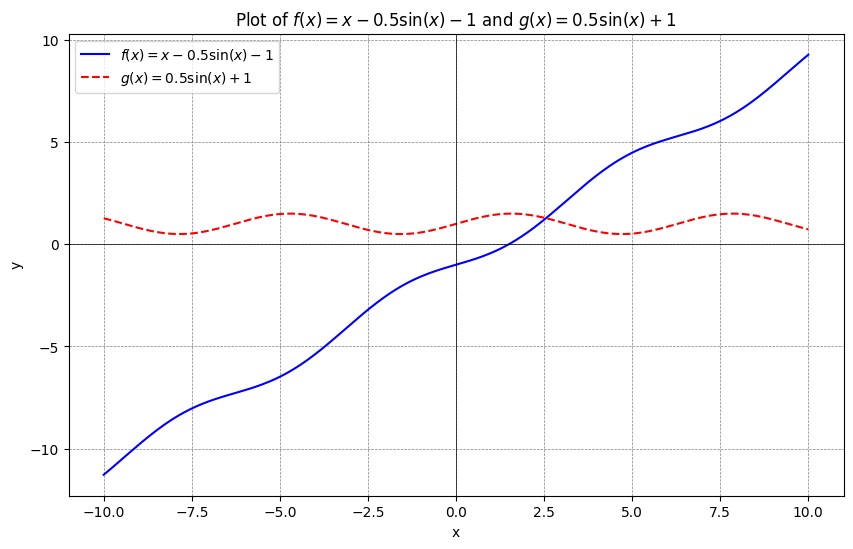

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(x):
    return x - 0.5 * np.sin(x) - 1

def g(x):
    return 0.5 * np.sin(x) + 1

# Create a range of x values
x = np.linspace(-10, 10, 400)

# Compute the y values for each function
y_f = f(x)
y_g = g(x)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label='$f(x) = x - 0.5\sin(x) - 1$', color='blue')
plt.plot(x, y_g, label='$g(x) = 0.5\sin(x)+1$', color='red', linestyle='--')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = x - 0.5\sin(x) - 1$ and $g(x) = 0.5\sin(x)+1$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


### Python code for fixed-point method

In [ ]:
def fixed_point_method(g, x0, nmax):
  table4 = []

  x = x0
  for n in range(1, nmax+1):
    x_new = g(x)
    error = abs(x_new - x)

    table4.append([n, x_new, error])

    if n >= nmax:
      print()
      print("The root after",n,"interations of the fixed-point method is", x_new)
      print()
      return table4

    x = x_new

  return table4

# Defining g(x)

g = lambda x: 0.5*math.sin(x) + 1

# Running 5 interations of the fixed-point method

table4 = fixed_point_method(g, 0.5, 5)

df = pd.DataFrame(table4, columns=['n', 'x_new', 'abs error'])
df.style.hide(axis='index')


The root after 5 interations of the fixed-point method is 1.4986996982350211



n,x_new,abs error
1,1.239713,0.739713
2,1.472845,0.233133
3,1.497603,0.024758
4,1.498661,0.001058
5,1.498700,0.000038


## Convergence Analysis
The convergence or divergence of the fixed-point method depends on the properties of the function $𝑔(𝑥)$ used in the iteration $𝑥_{𝑛+1}=g(x_n)$.

\
The key factors influencing whether the method converges or diverges are:
1. Lipschitz Condition: The fixed-point iteration $x_{n+1}=g(x_n)$ will converge if $g(x)$ satisfies the Lipschitz condition with a Lipschitz constant $𝐿$ such that $|g'(x)|<= L < 1$ for all $x$ in the interval of interest. This ensures that the function does not stretch the distance between points too much, which is crucial for convergence.

2. Derivative Condition: If $g'(x)$ is continuous and $|g'(x)|< 1$ in the interval, then the fixed-point method will converge to the root. This condition guarantees that the function $g(x)$ will pull the iterates $x_n$ closer to the fixed-point rather than pushing them away.
3. Initial Guess: The initial guess $x_0$ should be chosen such that it is close to the fixed point and within the region where the convergence criteria (like Lipschitz condition) are satisfied. A poor initial guess can lead to divergence if it lies outside the region of convergence.